### Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np  
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics 

### Loading the data from the provided external URL

In [2]:
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Visualization the dataset

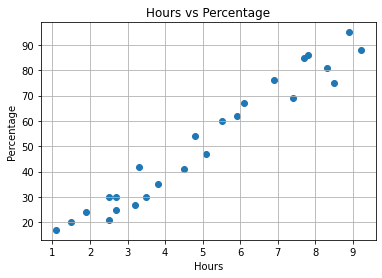

In [6]:
plt.title("Hours vs Percentage")
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.scatter(data['Hours'],data['Scores'])
plt.grid()
plt.show()

### Outlier detection

In [7]:
lower_limit=data.mean()-3*data.std()
upper_limit=data.mean()+3*data.std()

In [8]:
lower_limit[0]

-2.563282172962272

In [9]:
upper_limit[0]

12.587282172962272

In [10]:
filtered_data=data[(data.iloc[:,0]>lower_limit[0]) & (data.iloc[:,0]<upper_limit[0])]

In [11]:
data.count()

Hours     25
Scores    25
dtype: int64

In [12]:
filtered_data.count()

Hours     25
Scores    25
dtype: int64

### Visualizing the distribution of data

<AxesSubplot:xlabel='Hours', ylabel='Density'>

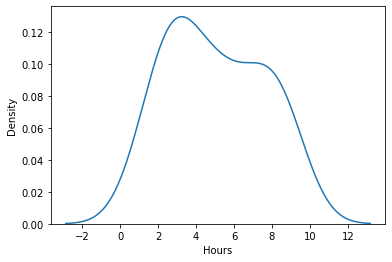

In [13]:
sns.kdeplot(data.iloc[:,0])

<AxesSubplot:xlabel='Scores', ylabel='Density'>

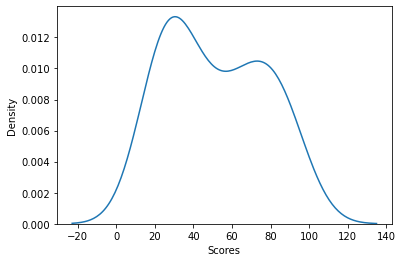

In [14]:
sns.kdeplot(data.iloc[:,1])

### Shapiro Wilk test for testing the distribution of data is normal or not

In [15]:
shapiro(data.iloc[:,0])


ShapiroResult(statistic=0.9401376247406006, pvalue=0.1491180658340454)

### Correlation Analysis

<AxesSubplot:>

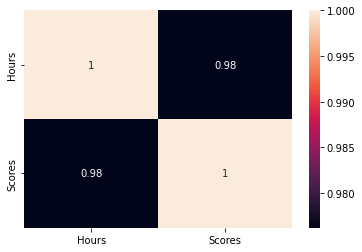

In [16]:
sns.heatmap(data.corr(),annot=True)

### Training and Testing data

In [17]:
independent_feature = data.iloc[:, :-1].values  
dependent_feature = data.iloc[:, 1].values  

In [18]:
 x_train, x_test, y_train, y_test = train_test_split(independent_feature, dependent_feature, 
                            test_size=0.2, random_state=42) 

### Model building

In [19]:
linear_model = LinearRegression()  
linear_model.fit(x_train, y_train) 

LinearRegression()

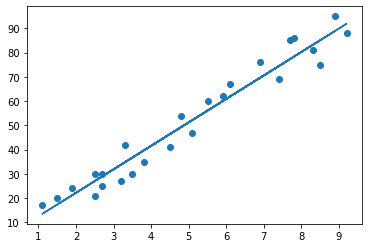

In [20]:
line = linear_model.coef_*independent_feature+linear_model.intercept_
plt.scatter(independent_feature, dependent_feature)
plt.plot(independent_feature, line);
plt.show()

In [21]:
y_pred = linear_model.predict(x_test)

### Calculating the error metrics

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred)) 

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272


### Providing custom input into the model

In [24]:
hours_of_study=float(input("Enter the number of hours of study:"))

Enter the number of hours of study:9.25


In [32]:
percentage_prediction = linear_model.predict([[hours_of_study]])
print("No of Hours = {}".format(hours_of_study))
print("Predicted Score = {}".format(percentage_prediction[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494
